<a href="https://colab.research.google.com/github/Abhi-nand/Simple-Linear-Regression/blob/main/SLR_MLR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## Simple Linear Regression Analysis

### Importing the required Python packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


### Reading the data

In [ ]:
weather_df=pd.read_csv('WeatherHistory_Data_Concept.csv')
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.83,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.83,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.0,14.96,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.0,15.83,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.0,15.83,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.02,26.02,0.43,11.00,31.0,16.10,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.58,24.58,0.48,10.09,20.0,15.55,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.04,22.04,0.56,8.98,30.0,16.10,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.52,21.52,0.60,10.53,20.0,16.10,0.0,1015.95,Partly cloudy starting in the morning.


### Performing data preparation 

#### Visualization of Data

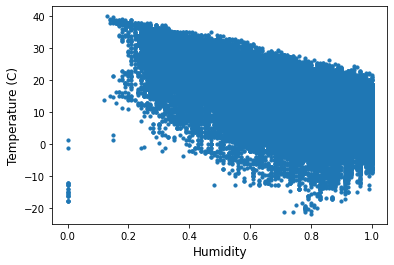

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
weather_df.plot.scatter(x = 'Humidity', y = 'Temperature (C)', s = 10, ax=ax);
plt.show()

#### Splitting data

In [ ]:
X=np.array(weather_df['Humidity']).reshape((-1, 1))
y=np.array(weather_df['Temperature (C)']).reshape((-1, 1))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

In [ ]:
s_model = LinearRegression().fit(X_train, y_train)
s_r_sq=s_model.score(X_train, y_train)

In [ ]:
s_model

LinearRegression()

In [ ]:
print('coefficient of determination:', s_r_sq)
print('intercept:', s_model.intercept_)
print('slope:', s_model.coef_)

coefficient of determination: 0.39811068587091336
intercept: [34.59003086]
slope: [[-30.84916084]]


### Predict the model

In [ ]:
y_pred = s_model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[11.76165184]
 [ 9.91070219]
 [14.53807632]
 ...
 [12.07014345]
 [10.2191938 ]
 [ 8.98522737]]


### Evaluating the model performance

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(MSE, MAE, RMSE)

54.32513530733365 6.018169619440337 7.370558683528247


(0.0, 30.0)

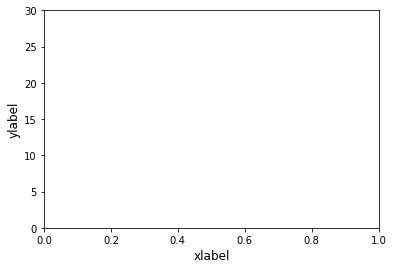

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
plt.ylim((0,30))

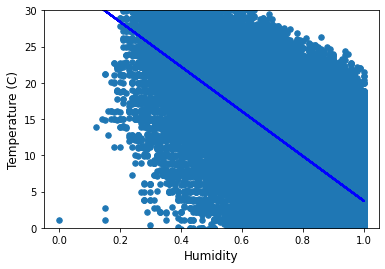

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
plt.ylim((0,30))
#weather_df_test=X_test
weather_df.plot.scatter(x = 'Humidity', y = 'Temperature (C)', s = 30, ax=ax)
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.show()

## Demo 2.2 : Multiple Linear Regression Analysis

### Performing data preparation

In [ ]:
X_2 = weather_df[['Humidity', 'Wind Speed (km/h)']].values.reshape(-1,2)
Y =weather_df['Temperature (C)']
x = X_2[:, 0]
y = X_2[:, 1]
z = Y

In [ ]:
X_2.shape

(96453, 2)

In [ ]:
weather_df[['Humidity', 'Wind Speed (km/h)']].values

array([[ 0.89, 14.12],
       [ 0.86, 14.26],
       [ 0.89,  3.93],
       ...,
       [ 0.56,  8.98],
       [ 0.6 , 10.53],
       [ 0.61,  5.88]])

In [ ]:
weather_df[['Humidity', 'Wind Speed (km/h)']].values.reshape(-1,2)

array([[ 0.89, 14.12],
       [ 0.86, 14.26],
       [ 0.89,  3.93],
       ...,
       [ 0.56,  8.98],
       [ 0.6 , 10.53],
       [ 0.61,  5.88]])

#### Visualization of data

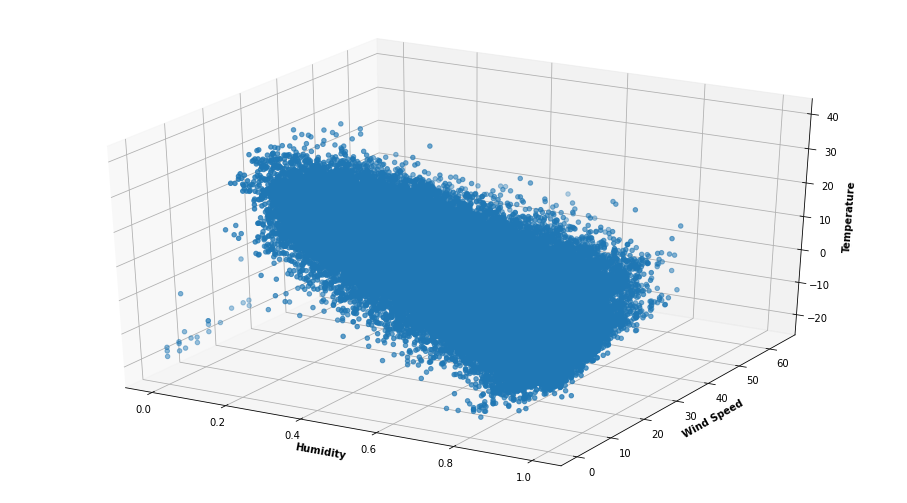

In [ ]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
 linestyle ='-.', linewidth = 0.3,
 alpha = 0.2)
# Creating plot
ax.scatter3D(x, y, z)
ax.set_xlabel('Humidity', fontweight ='bold')
ax.set_ylabel('Wind Speed', fontweight ='bold')
ax.set_zlabel('Temperature', fontweight ='bold')
# show plot
plt.show()

#### Splitting the data

In [ ]:
weather_df[['Humidity','Pressure (millibars)','Wind Speed (km/h)']].values.reshape(-1,3)

array([[8.90000e-01, 1.01513e+03, 1.41200e+01],
       [8.60000e-01, 1.01563e+03, 1.42600e+01],
       [8.90000e-01, 1.01594e+03, 3.93000e+00],
       ...,
       [5.60000e-01, 1.01566e+03, 8.98000e+00],
       [6.00000e-01, 1.01595e+03, 1.05300e+01],
       [6.10000e-01, 1.01616e+03, 5.88000e+00]])

In [ ]:
X3=weather_df[['Humidity','Pressure (millibars)','Wind Speed (km/h)']].values.reshape(-1,3)
z3=np.array(z)
X_train,X_test,z_train,z_test=train_test_split(X3,z3,test_size=0.3,random_state=200)

### Training the model

In [ ]:
model_mul = LinearRegression().fit(X_train, z_train)

In [ ]:
print('Intercept: \n', model_mul.intercept_)
print('Coefficients: \n', model_mul.coef_)
r_sq2 = model_mul.score(X_train,z_train)
print('coefficient of determination:', r_sq2)

Intercept: 
 38.648794136151835
Coefficients: 
 [-3.23663921e+01 -8.52434845e-04 -1.93208461e-01]
coefficient of determination: 0.41669862103768895


### Evaluating the model performance

In [ ]:
RMSE = mean_squared_error(z_test, model_mul.predict(X_test), squared=False)
print(RMSE)

7.250793404888596


In [ ]:
np.meshgrid(x_pred, z_pred)

[array([[0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
         0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
         0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ],
        [0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
         0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
         0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ],
        [0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
         0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
         0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ],
        [0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
         0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
         0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ],
        [0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
         0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
         0.71428571, 0.7857142

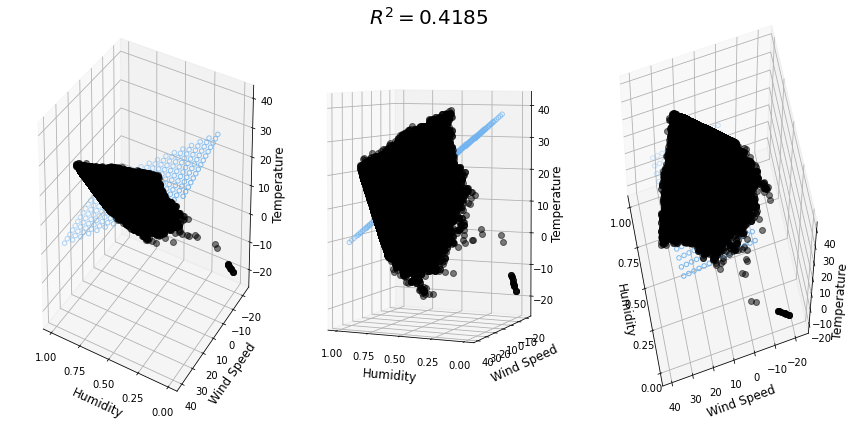

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x_pred = np.linspace(0, 1, 15) # range of porosity values
z_pred = np.linspace(0, 32, 15) # range of brittleness values
xx_pred, zz_pred = np.meshgrid(x_pred, z_pred)
model_viz = np.array([xx_pred.flatten(), zz_pred.flatten()]).T
ols = LinearRegression()
model = ols.fit(X_2, Y)
r2 = model.score(X_2, Y)
predicted = model.predict(model_viz)
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), zz_pred.flatten(), model.predict(model_viz), facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Humidity', fontsize=12)
    ax.set_ylabel('Wind Speed', fontsize=12)
    ax.set_zlabel('Temperature', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.4f$' % r2, fontsize=20)

fig.tight_layout()